<a href="https://colab.research.google.com/github/sabamontazeri/projectmabani/blob/main/lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
Data=pd.read_csv('/content/LungCancer.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
! apt-get install git
! git config --global user.email "sabaabaszade3@gmail.com"
! git config --global user.name "sabamontazeri"
!git clone https://github.com/sabamontazeri/machine-learning-course.git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
fatal: destination path 'machine-learning-course' already exists and is not an empty directory.


In [127]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OrdinalEncoder,LabelEncoder
Dataset=Data.drop(['index','Patient Id'],axis=1)
#encoder=LabelEncoder()
#Dataset['Level']=encoder.fit_transform(Dataset['Level'])
Dataset.shape


(1000, 24)

In [128]:
import numpy as np

from scipy import stats
import numpy as np
Zscores = Data.select_dtypes(include='number').apply(stats.zscore)
threshold_z = 2.7

outlier_indices = np.where(Zscores > threshold_z)[0]
outlier_indices=outlier_indices.tolist()
#print(type(outlier_indices))
Dataset=Dataset.drop(outlier_indices)
print(Dataset.shape)

(980, 24)


In [121]:
from sklearn.model_selection import train_test_split
X=Dataset.drop(['Level'],axis=1)
y=Dataset['Level']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42,shuffle=True)

In [122]:
Scalerx=MinMaxScaler()

X_train=Scalerx.fit_transform(X_train)
X_test=Scalerx.transform(X_test)

In [131]:
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier(max_depth=4,min_samples_split=20)
params = {'max_leaf_nodes': list(range(2, 20)), 'min_samples_split': [2,8,10,20,30,40]}
grid_search_cv = GridSearchCV(tree.DecisionTreeRegressor(random_state=42), params, verbose=0, cv=5)
clf.fit(X_train ,y_train)
treepred_train=clf.predict(X_train)
treepred_test=clf.predict(X_test)

print(accuracy_score(y_train,treepred_train))
print(accuracy_score(y_test,treepred_test))

1.0
1.0


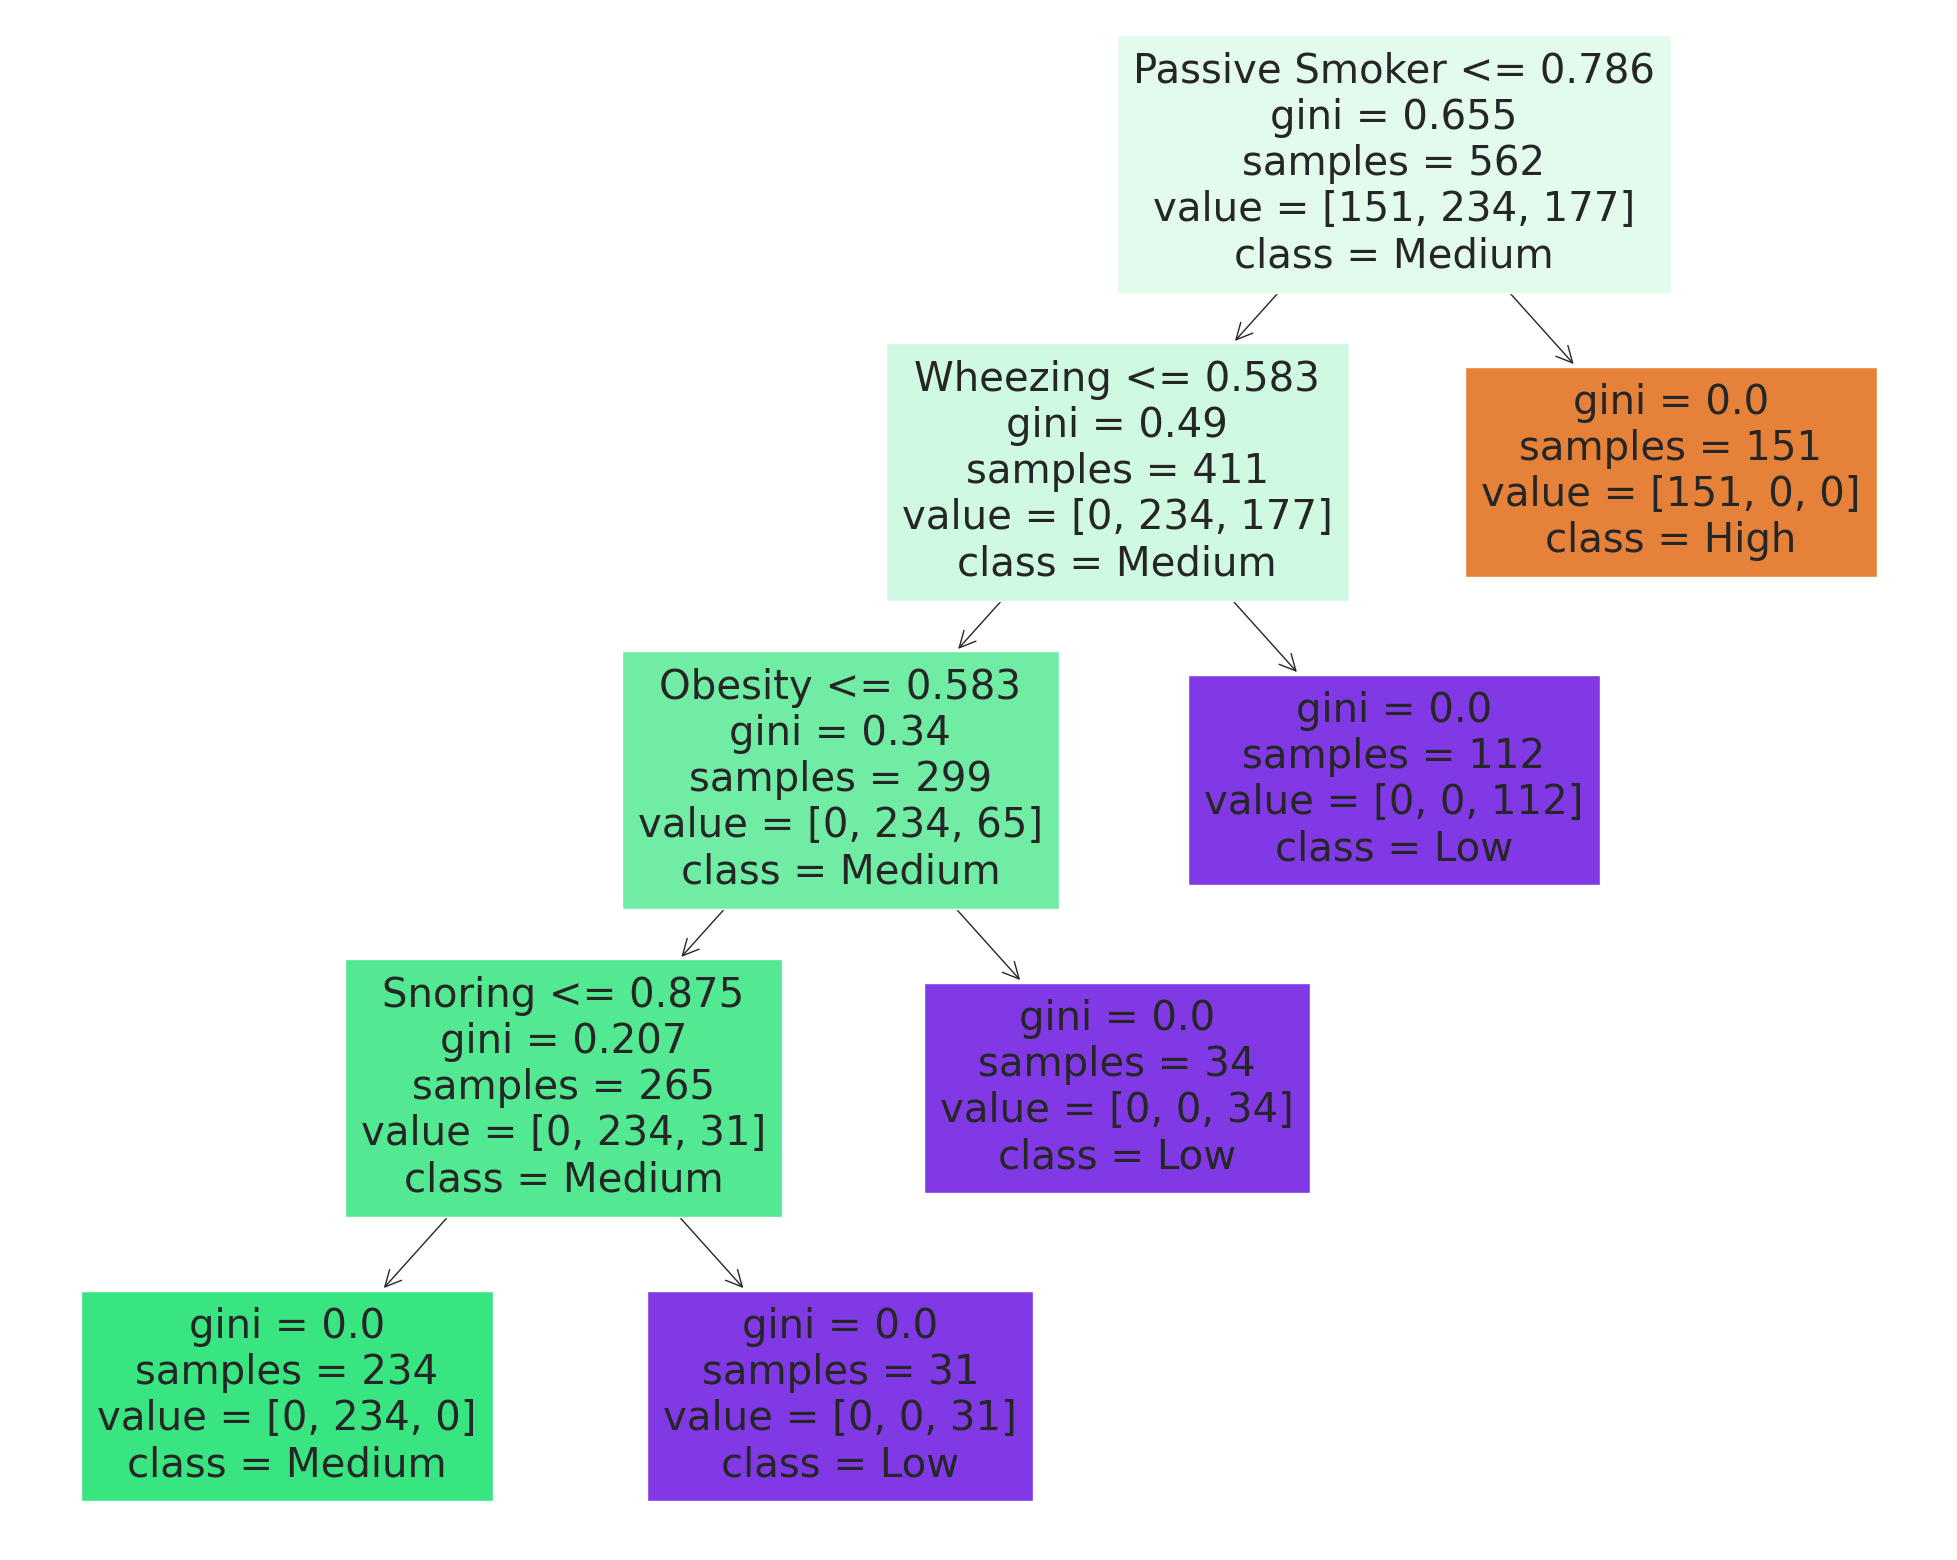

In [132]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=X.columns,
                   class_names=['High','Medium','Low'],
                   filled=True)